In [1]:
%load_ext lab_black

In [11]:
import warnings

warnings.filterwarnings(
    "ignore", "This figure was using constrained_layout==True"
)

In [4]:
import pandas as pd
from diviner import calib, file_utils as fu, plot_utils as pu

pd.__version__

'0.24.1'

In [3]:
l1a = fu.L1ADataFile.from_timestr('2009092809')
df = l1a.open()

In [5]:
obs = fu.DivObs("2010010100")

In [6]:
df = obs.get_l1a()

In [7]:
df.calib_block_labels.value_counts()

0    25696
6      672
5      352
4      352
3      352
2      352
1      352
Name: calib_block_labels, dtype: int64

In [8]:
df.is_calib.value_counts()

False    26528
True      1600
Name: is_calib, dtype: int64

In [9]:
df.is_stview.value_counts()  # that 80 is one st_view

False    28048
True        80
Name: is_stview, dtype: int64

the reason for the moving data after the last sv_view being cut-off abruptly, is that the commanded azimuth and elevation are nadir(-like) and not fitting to any calib pointing definition. That's why the moving part at the end is in no block definition, even so the blocks contain all other moving data.

In [59]:
%matplotlib widget

Calib block 0 has no caldata.


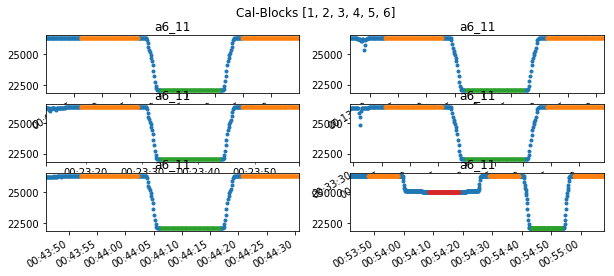

In [12]:
pu.plot_all_calib_blocks(df, legend=False)

In [13]:
caldata = df[df.is_calib]
calgrouped = calib.get_calib_blocks(caldata, "calib")

In [14]:
calgrouped.keys()

dict_keys([1, 2, 3, 4, 5, 6])

In [15]:
cb = calib.CalBlock(calgrouped[4])

In [16]:
caldata.calib_block_labels.value_counts()

6    400
5    240
4    240
3    240
2    240
1    240
Name: calib_block_labels, dtype: int64

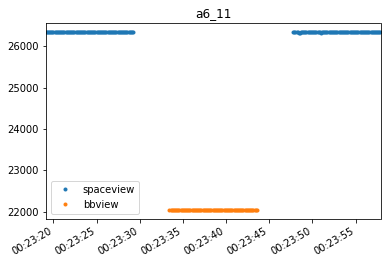

In [17]:
pu.plot_calib_block(caldata, "calib", 3)

In [18]:
for key in calgrouped.keys():
    cb = calib.CalBlock(calgrouped[key])
    df = pd.DataFrame(index=range(1,22))
    for i,channel in enumerate(calib.thermal_channels):
        i += 3
        data = cb.snr.ix[channel+'_01':channel+'_21']
        if i < 7:
            data.index = df.index
        else:
            data.index = range(21,0,-1)
        df[i] = data
    df_normed = (df - df.mean())*100/df.mean()
    df_normed.plot(style='*-', markersize=9)
    xlim(0,22)
    title("CalBlock {0}".format(key))
    xlabel("Detector")
    ylabel("Relative SNR")
    savefig('SNR_cb'+str(key),dpi=300)

AttributeError: 'CalBlock' object has no attribute 'snr'

In [28]:
fig, axes = plt.subplots(3,2)
for i in range(6):
    pu.plot_calib_block(df, 'calib',i+1, det='b3_11',ax=axes.flatten()[i])

FigureCanvasNbAgg()

KeyError: 'calib_block_labels'

In [320]:
range(21,0,-1)

[21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [321]:
df

,3,4,5,6,7,8,9
1,1102.723958,495.463542,517.609375,2581.864583,1960.010417,443.005208,189.682292
2,1179.723958,570.796875,606.609375,3316.781250,2202.015625,556.072917,225.005208
3,1190.505208,577.526042,604.000000,3402.692708,2487.359375,603.546875,244.000000
4,1167.265625,590.557292,616.552083,3345.994792,2429.421875,634.458333,234.848958
5,1158.296875,589.338542,612.286458,3361.135417,2513.072917,616.708333,244.843750
6,1190.302083,587.531250,606.078125,3398.739583,2683.541667,671.114583,256.473958
7,1174.661458,584.395833,611.937500,3548.083333,2645.520833,735.421875,244.307292
8,1186.796875,573.812500,618.463542,3500.661458,2712.020833,724.041667,247.765625
9,1184.041667,583.770833,625.359375,3603.973958,2849.020833,721.489583,272.218750
10,1170.416667,580.104167,620.276042,3542.390625,2518.083333,704.895833,261.036458


In [327]:
df.plot()

In [329]:
df_normed = (df - df.mean())*100/df.mean()

In [21]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111, projection='3d')
xs = np.arange(1,22)
ys = np.arange(3,10)
Y,X = meshgrid(ys,xs)
ax.plot_surface(X,Y,df_normed, rstride=1, cstride=1, alpha=0.3)
ax.set_xlabel('Detector')
ax.set_ylabel('Channel')
ax.set_zlabel("relative SNR")
ax.contour(X, Y, df_normed, zdir='z', offset = -40, cmap=cm.coolwarm)
ax.contour(X, Y, df_normed, zdir='x', offset=25, cmap=cm.coolwarm)
ax.contour(X, Y, df_normed, zdir='y', offset=10, cmap=cm.coolwarm)
ax.set_zlim(-40,40)
ax.set_xlim(-1, 25)
ax.set_ylim(2,10)
ax.view_init(20,-130)

# ax = fig.add_subplot(122, projection='3d')
# xs = np.arange(1,22)
# ys = np.arange(3,10)
# Y,X = meshgrid(ys,xs)
# ax.plot_surface(X,Y,df_normed, rstride=1, cstride=1, alpha=0.3)
# ax.set_xlabel('Detector')
# ax.set_ylabel('Channel')
# ax.set_zlabel("relative SNR")
# ax.contour(X, Y, df_normed, zdir='z', offset = -40, cmap=cm.coolwarm)
# ax.contour(X, Y, df_normed, zdir='x', offset=-1, cmap=cm.coolwarm)
# ax.contour(X, Y, df_normed, zdir='y', offset=11, cmap=cm.coolwarm)
# ax.set_zlim(-40,40)
# ax.set_xlim(-1, 22)
# ax.set_ylim(2,11)
# ax.view_init(20,-60)

# savefig('Diviner_SNR.png',dpi=300)

ValueError: Unknown projection '3d'

<Figure size 1008x576 with 0 Axes>

In [351]:
Y.shape

(21, 7)

In [346]:
df_normed.shape

(21, 7)

In [22]:
bbviews = cb.df[cb.df.is_bbview]

In [23]:
bbviews[16:]

,q,sclk,sounding,from_pkt,pkt_count,safing,safed,freezing,frozen,rolling,...,calib_block_labels,space_block_labels,bb_block_labels,st_block_labels,is_spaceview,is_bbview,is_stview,is_moving,is_stowed,is_calib
2010-01-01 00:03:02.567,0,2.839970e+08,1,11121,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,False,True,False,False,False,True
2010-01-01 00:03:02.695,0,2.839970e+08,2,11121,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,False,True,False,False,False,True
2010-01-01 00:03:02.823,0,2.839970e+08,3,11122,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,False,True,False,False,False,True
2010-01-01 00:03:02.951,0,2.839970e+08,4,11122,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,False,True,False,False,False,True
2010-01-01 00:03:03.079,0,2.839970e+08,5,11123,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,False,True,False,False,False,True
2010-01-01 00:03:03.207,0,2.839970e+08,6,11124,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,False,True,False,False,False,True
2010-01-01 00:03:03.335,0,2.839970e+08,7,11124,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,False,True,False,False,False,True
2010-01-01 00:03:03.463,0,2.839970e+08,8,11125,50265.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,False,True,False,False,False,True
2010-01-01 00:03:03.591,0,2.839970e+08,9,11125,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,False,True,False,False,False,True
2010-01-01 00:03:03.719,0,2.839970e+08,10,11126,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,False,True,False,False,False,True


In [12]:
list(cb.df.groupby('is_spaceview'))

[(False,
                              q          sclk  sounding  from_pkt  pkt_count  \
2009-09-28 09:07:52.478000  0  2.758217e+08         1      4621        NaN   
2009-09-28 09:07:52.606000  0  2.758217e+08         2      4621        NaN   
2009-09-28 09:07:52.734000  0  2.758217e+08         3      4622        NaN   
2009-09-28 09:07:52.862000  0  2.758217e+08         4      4622        NaN   
2009-09-28 09:07:52.990000  0  2.758217e+08         5      4623        NaN   
2009-09-28 09:07:53.118000  0  2.758217e+08         6      4624        NaN   
2009-09-28 09:07:53.246000  0  2.758217e+08         7      4624        NaN   
2009-09-28 09:07:53.374000  0  2.758217e+08         8      4625        463   
2009-09-28 09:07:53.502000  0  2.758217e+08         9      4625        NaN   
2009-09-28 09:07:53.630000  0  2.758217e+08        10      4626        NaN   
2009-09-28 09:07:53.758000  0  2.758217e+08        11      4627        NaN   
2009-09-28 09:07:53.886000  0  2.758217e+08        12

In [24]:
s = pd.Series(cb.df.index).diff()

In [26]:
crit = np.timedelta64(130, "ms")
s[s > crit]

80    00:00:04.224000
160   00:00:04.224000
dtype: timedelta64[ns]

In [251]:
d = {}
for label in cb.sv_labels:
    d[label] = calib.get_mean_time(cb.df[cb.df.sv_block_labels==label])

In [256]:
rng2011 = pd.date_range('1/1/2011', periods=72, freq='H')

In [258]:
rng2011.union?

In [133]:
spacelooks = df.groupby('sv_block_labels')

In [154]:
def get_offsets(df):
    view = df[df.is_spaceview]
    if len(view) != 80:
        return
    return view[16:].mean()

In [155]:
offsets = calib.get_data_columns(spacelooks.agg(get_offsets))

In [171]:
offsets.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype=int64)

In [177]:
offset_times = spacelooks.a3_11.agg(calib.get_mean_time)

In [179]:
offsets.index = offset_times

In [183]:
offsets.b3_11.dropna?

In [120]:
cb.sv_stds.a1_11

sv_block_labels
4                  2.924255
5                  3.254379
Name: a1_11, dtype: float64

In [186]:
cb.df.a3_11.plot(style='*')

In [196]:
cb.sv_labels

array([1, 2, 3])

In [187]:
df.sv_block_labels.value_counts().sort_index()

0     26576
1       128
2       112
3       112
4       128
5       112
6       128
7       112
8       128
9       112
10      128
11      112
12      128
13      112
dtype: int64

In [188]:
df.bb_block_labels.value_counts()

0    27456
6      112
5      112
4      112
3      112
2      112
1      112
dtype: int64

In [189]:
pu.plot_calib_block(df,'bb_block_labels',6)

In [25]:
t1 = df[df.calib_block_labels==2].index[0]

In [26]:
t2 = df[df.calib_block_labels==4].index[-1]

In [27]:
df.ix[t1:t2]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9968 entries, 2011-04-01 00:17:12.135999 to 2011-04-01 00:38:27.928999
Columns: 252 entries, sclk to is_calib
dtypes: bool(6), float64(241), int32(4), int64(1)

In [28]:
df.filter(regex='block_labels')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56240 entries, 2011-04-01 00:00:01.978000 to 2011-04-01 02:00:00.697000
Data columns (total 4 columns):
calib_block_labels    56240  non-null values
sv_block_labels       56240  non-null values
bb_block_labels       56240  non-null values
st_block_labels       56240  non-null values
dtypes: int32(4)

In [29]:
ax = df.filter(regex='block_labels').plot(linewidth=2)
df.filter(regex='is_').plot(ax=ax,linewidth=2)

In [30]:
pu.plot_calib_block(df,'calib_block_labels',3,det='b1_11')

the calib block labels contain moving data as well, to be able to mark sv and bb views together as 1 block if they happen together. that's why I have to subtract the moving data if I want to compare the resulting number with df.is_calib entries.

In [31]:
df[(df.calib_block_labels >0) & (df.moving==1)]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1568 entries, 2011-04-01 00:06:53.631999 to 2011-04-01 01:55:26.259000
Columns: 252 entries, sclk to is_calib
dtypes: bool(6), float64(241), int32(4), int64(1)

In [32]:
df.calib_block_labels.value_counts().sort_index()[1:].sum()

4608

In [33]:
2496-896

1600

this is the same as the value of all is_calib data (which does not contain moving data)

In [34]:
df.is_calib.value_counts()

False    53200
True      3040
dtype: int64

In [35]:
pump = fu.Div247DataPump('201104')

In [97]:
df = pump.get_n_hours(1)

/Users/maye/data/diviner/div247/201104/2011040100.div247


In [37]:
df.groupby(['calib_block_labels','is_spaceview']).a3_11.mean()

calib_block_labels  is_spaceview
0                   False           22366.915404
1                   False           23167.416667
                    True            23815.556250
2                   False           23167.223958
                    True            23805.956250
3                   False           23375.290323
                    True            23808.483333
4                   False           22879.781250
                    True            23825.062500
5                   False           22551.218750
                    True            23854.287500
6                   False           22421.588542
                    True            23884.593750
Name: a3_11, dtype: float64

In [38]:
def ptp(arr):
    return arr.max() - arr.min()

In [39]:
df.groupby(['calib_block_labels','is_spaceview'])['a3_11','a4_11'].agg([ptp,'size'])

a3_11         a4_11       
                                   ptp   size    ptp   size
calib_block_labels is_spaceview                            
0                  False          5052  25616   2357  25616
1                  False          1198    192    608    192
                   True             14    160     16    160
2                  False          1181    192    597    192
                   True             16    160     13    160
3                  False          1180    496    596    496
                   True             28    240     22    240
4                  False          2081    192    942    192
                   True             15    160     15    160
5                  False          3933    192   1922    192
                   True             23    160     25    160
6                  False          4497    192   2170    192
                   True             21    160     23    160

In [40]:
grouped = df.groupby(['calib_block_labels'])

In [41]:
def myfunc(arr):
    local_sv = df.ix[arr.index]['is_spaceview']
    return arr[local_sv].mean()

In [42]:
grouped.a3_11.agg(myfunc)

calib_block_labels
0                              NaN
1                     23815.556250
2                     23805.956250
3                     23808.483333
4                     23825.062500
5                     23854.287500
6                     23884.593750
Name: a3_11, dtype: float64

In [43]:
df.groupby(['calib_block_labels','is_spaceview']).a3_11.mean()

calib_block_labels  is_spaceview
0                   False           22366.915404
1                   False           23167.416667
                    True            23815.556250
2                   False           23167.223958
                    True            23805.956250
3                   False           23375.290323
                    True            23808.483333
4                   False           22879.781250
                    True            23825.062500
5                   False           22551.218750
                    True            23854.287500
6                   False           22421.588542
                    True            23884.593750
Name: a3_11, dtype: float64

In [44]:
block1 = df[df.calib_block_labels==1]

In [45]:
block1[block1.is_spaceview].a3_11.mean()

23815.556250000001

In [46]:
grouped.a3_11.mean()

calib_block_labels
0                     22366.915404
1                     23462.025568
2                     23457.556818
3                     23516.548913
4                     23309.454545
5                     23143.522727
6                     23086.590909
Name: a3_11, dtype: float64

In [47]:
grouped[['a3_11']].transform(myfunc)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28112 entries, 2011-04-01 00:00:01.978000 to 2011-04-01 01:00:00.234000
Data columns (total 1 columns):
a3_11    2496  non-null values
dtypes: float64(1)

In [48]:
def get_sv(df, column='a3_11'):
    dfhere = df[df.is_spaceview]
    return dfhere.filter(regex='_11').mean()

In [49]:
grouped.apply(get_sv)

,a1_11,a2_11,a3_11,a4_11,a5_11,a6_11,b1_11,b2_11,b3_11
calib_block_labels,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22368.262500,22556.006250,23815.556250,23195.531250,23189.60625,26347.68750,30025.150000,28159.81250,27702.425000
2,22400.506250,22561.437500,23805.956250,23193.868750,23188.24375,26346.76875,30028.937500,28155.71875,27700.368750
3,22419.620833,22580.833333,23808.483333,23205.541667,23200.80000,26348.53750,30037.404167,28161.56250,27706.604167
4,22422.918750,22610.450000,23825.062500,23229.750000,23223.81875,26355.98750,30053.531250,28181.92500,27722.343750
5,22400.556250,22643.075000,23854.287500,23261.537500,23254.67500,26366.75000,30070.225000,28211.90000,27743.643750
6,22355.493750,22664.037500,23884.593750,23288.312500,23278.93750,26374.55000,30074.768750,28232.74375,27757.256250


In [50]:
grouped.a3_11.mean()

calib_block_labels
0                     22366.915404
1                     23462.025568
2                     23457.556818
3                     23516.548913
4                     23309.454545
5                     23143.522727
6                     23086.590909
Name: a3_11, dtype: float64

In [51]:
s = pd.Series(df.index)

In [56]:
fu.timediff(s)

0                NaT
1    00:00:00.127999
2    00:00:00.128001
3    00:00:00.128000
4    00:00:00.128000
5    00:00:00.127999
6    00:00:00.128001
7    00:00:00.128000
8    00:00:00.127999
9    00:00:00.128000
10   00:00:00.128001
11   00:00:00.128000
12   00:00:00.127999
13   00:00:00.128000
14   00:00:00.128001
...
28097   00:00:00.128000
28098   00:00:00.128000
28099   00:00:00.128000
28100   00:00:00.128000
28101   00:00:00.128000
28102   00:00:00.128000
28103   00:00:00.128000
28104   00:00:00.128000
28105   00:00:00.128000
28106   00:00:00.128000
28107   00:00:00.128000
28108   00:00:00.128000
28109   00:00:00.128000
28110   00:00:00.128000
28111   00:00:00.128000
Length: 28112, dtype: timedelta64[ns]

In [57]:
reload(calib)

<module 'calib' from 'calib.py'>

In [63]:
stframe = calib.get_calib_block(df,'st')[1]

In [64]:
stframe

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 272 entries, 2011-04-01 00:27:20.399999 to 2011-04-01 00:27:55.088000
Columns: 252 entries, sclk to is_calib
dtypes: bool(6), float64(241), int32(4), int64(1)

In [65]:
pu.plot_calib_block(df,'st',1)

In [66]:
pu.plot_calib_block(df,'sv',1)